#  Brain Tumor Classification using MRI Images

##  Overview
This project focuses on the classification of brain tumors using deep learning techniques, specifically Convolutional Neural Networks (CNN) and Transfer Learning. Brain tumors can be life-threatening, and early and accurate detection is critical for effective treatment. MRI (Magnetic Resonance Imaging) scans are commonly used for this purpose.

The project utilizes a dataset consisting of MRI images categorized into four classes:
- **Glioma**
- **Meningioma**
- **Pituitary**
- **No Tumor**

The aim is to build a robust deep learning model that can accurately classify MRI scans into one of the above classes.


## Objectives
- Explore and understand the dataset
- Apply preprocessing techniques (resizing, normalization, augmentation)
- Train a custom CNN model for baseline comparison
- Apply Transfer Learning using pretrained models (e.g., ResNet, EfficientNet)
- Evaluate and compare both models using various metrics
- Improve model performance using tuning techniques




##  Preparing and Preprocessing the Data

### Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')



## import project utils 

In [2]:
from src.data_utils import load_images_to_numpy
from src.preprocess_image import preprocess_image
from src.utils_evaluation import evaluate_model , full_classification_report

## 1.Load the data

In [3]:
# data path 
test_path = '../data/raw/Testing'
train_path = '../data/raw/Training'

In [4]:
X_train, y_train = load_images_to_numpy(train_path, target_size=(128, 128))
X_test, y_test= load_images_to_numpy(test_path, target_size=(128, 128))

Loading 'pituitary': 100%|██████████| 300/300 [00:02<00:00, 104.59it/s]


In [5]:
print("X_train:", X_train.shape)
print("Number of classes in y_train:", len(set(y_train)))


X_train: (5712, 128, 128, 3)
Number of classes in y_train: 4


In [6]:
print("X_train:", X_test.shape)
print("Number of classes in y_test:", len(set(y_test)))


X_train: (1311, 128, 128, 3)
Number of classes in y_test: 4


In [7]:
from collections import Counter
def plot_class_distribution(labels, title):
    counter = Counter(labels)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(classes, counts, color='skyblue')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")

    # Add counts on top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center')

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()




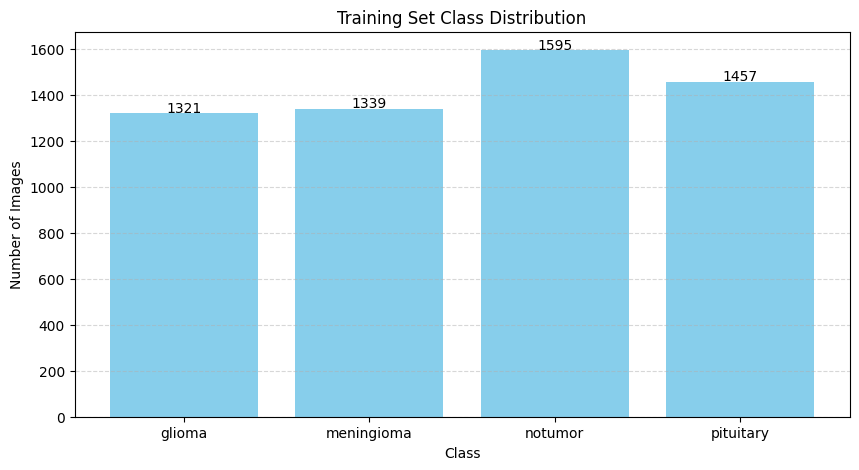

In [8]:
plot_class_distribution(y_train, "Training Set Class Distribution")

In [9]:
from collections import defaultdict
import random
def plot_random_images_by_class(X, y, class_names=None, samples_per_class=5, figsize=(15, 10)):
    """
    X: array-like of images
    y: labels (list or array)
    class_names: list of class names (optional)
    samples_per_class: number of images to show per class
    figsize: size of the figure
    """
    y = np.array(y)
    class_to_images = defaultdict(list)
    

    for img, label in zip(X, y):
        class_to_images[label].append(img)
    
    classes = sorted(class_to_images.keys())
    num_classes = len(classes)
    

    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=figsize)
    fig.suptitle(' Images per Class', fontsize=18)

    for row, cls in enumerate(classes):
        imgs = random.sample(class_to_images[cls], min(samples_per_class, len(class_to_images[cls])))
        for col in range(samples_per_class):
            ax = axes[row, col] if num_classes > 1 else axes[col]
            if col < len(imgs):
                img = imgs[col]
                ax.imshow(img.astype(np.uint8))
                ax.axis('off')
                if col == 0:
                    name = class_names[cls] if class_names else str(cls)
                    ax.set_title(f"Class {name}", fontsize=20)
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

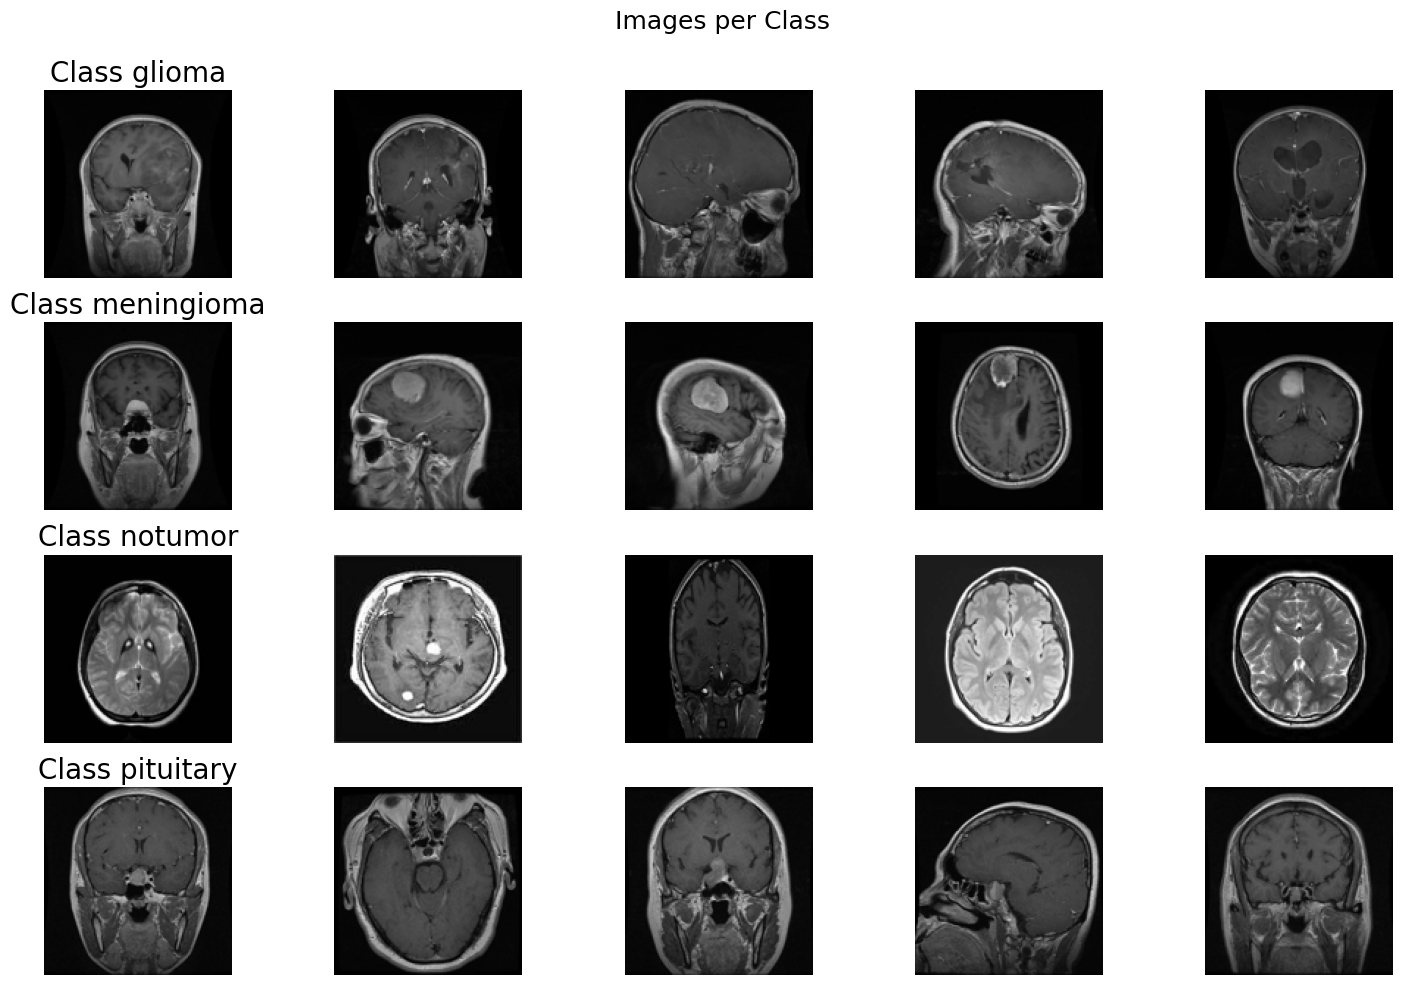

In [10]:
plot_random_images_by_class(X_train, y_train, class_names=None, samples_per_class=5, figsize=(15, 10))

In [30]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: One-hot Encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=4)
y_test_onehot = to_categorical(y_test_encoded, num_classes=4)

# Check shape
print("y_train_onehot shape:", y_train_onehot.shape)
print("y_test_onehot shape:", y_test_onehot.shape)
print("Classes:", label_encoder.classes_)


y_train_onehot shape: (5712, 4)
y_test_onehot shape: (1311, 4)
Classes: ['glioma' 'meningioma' 'notumor' 'pituitary']


In [31]:
# Check shape and type
print("X_train: type =", type(X_train), ", shape =", X_train.shape)
print("y_train: type =", type(y_train_onehot), ", shape =", y_train_onehot.shape)
print("X_test:  type =", type(X_test), ", shape =", X_test.shape)
print("y_test:  type =", type(y_test_onehot), ", shape =", y_test_onehot.shape)

# Check example values
print("\nSample y_train values:", y_train_onehot[:5])
print("Sample y_test values:", y_test_onehot[:5])

X_train: type = <class 'numpy.ndarray'> , shape = (5712, 128, 128, 3)
y_train: type = <class 'numpy.ndarray'> , shape = (5712, 4)
X_test:  type = <class 'numpy.ndarray'> , shape = (1311, 128, 128, 3)
y_test:  type = <class 'numpy.ndarray'> , shape = (1311, 4)

Sample y_train values: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Sample y_test values: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


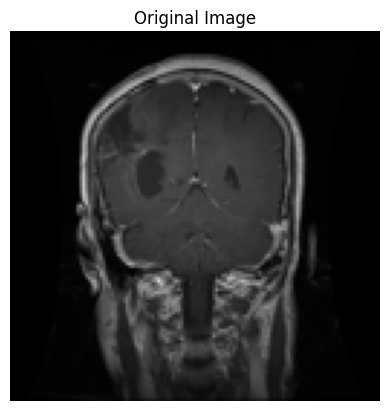

Original Min: 0
Original Max: 220


In [28]:
import matplotlib.pyplot as plt

img_original = X_train[10]

plt.imshow(img_original)
plt.axis('off')
plt.title("Original Image")
plt.show()

print("Original Min:", X_train[10].min())
print("Original Max:", X_train[10].max())


In [ ]:
from sklearn.model_selection import train_test_split

# Split test set into validation and final test set (مثلاً 50% - 50%)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test_onehot, test_size=0.5, random_state=42, stratify=y_test)


In [36]:
# save the data for later use
np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/y_train.npy', y_train_onehot)
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/y_test.npy', y_test)
np.save('../data/processed/X_val.npy', X_val)
np.save('../data/processed/y_val.npy', y_val)